In [67]:
import pandas as pd
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
%matplotlib inline
pd.options.display.max_rows = 10
plt.style.use('fivethirtyeight')

In [68]:
df0 = pd.DataFrame.from_csv('facebooknaive.csv',header=0,index_col=None); df0.head()

,metacritic,bias,actors_likes,director_likes,writer_likes,movie_likes
0,11.312406,1.0,0.540625,2.396735,2.177129,5.830888
1,10.654445,1.0,1.775080,2.632449,2.391246,2.705245
2,11.051242,1.0,0.491731,2.393839,0.000000,5.821847
3,9.251031,1.0,0.374191,0.000000,0.000000,3.946647
4,10.759683,1.0,2.129763,0.516924,0.469560,4.288445


In [69]:
df1 = pd.DataFrame.from_csv('facebook.csv',header=0,index_col=None); df1.head()

,metacritic,bias,actors_likes,director_likes,writer_likes,movie_likes
0,11.753275,1.0,0.534921,2.542807,2.068782,7.275998
1,11.751300,1.0,2.104764,2.465665,2.296811,3.751087
2,11.481932,1.0,0.462073,2.539735,0.000000,7.264716
3,9.611564,1.0,0.354804,0.000000,0.000000,4.924773
4,12.262316,1.0,2.375781,0.500139,0.484480,5.440450


In [70]:
df2 = pd.DataFrame.from_csv('facebook_awd.csv',header=0,index_col=None); df2.head()

,metacritic,bias,actors_likes,director_likes,writer_likes,movie_likes,actors_awards,director_awards,writer_awards
0,11.753275,1.0,0.534921,2.542807,2.068782,7.275998,0.58140,2.741758,2.505667
1,11.751300,1.0,2.104764,2.465665,2.296811,3.751087,1.39919,1.612615,1.457766
2,11.481932,1.0,0.462073,2.539735,0.000000,7.264716,0.00000,2.189215,0.000000
3,9.611564,1.0,0.354804,0.000000,0.000000,4.924773,0.00000,0.000000,0.000000
4,12.262316,1.0,2.375781,0.500139,0.484480,5.440450,4.39284,0.936926,0.940264


# Facebook-only Model (naive)

In [77]:
y = df0.iloc[:,0]
X = df0.iloc[:,1:]

Split the dataset, then set aside the test set for later...

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Cross-Validation:

In [82]:
model = RidgeCV(alphas=(10,25,50,75,100), fit_intercept = True, cv = 10)
fit = model.fit(X_train,y_train)

Score our cross-validated model on the test set

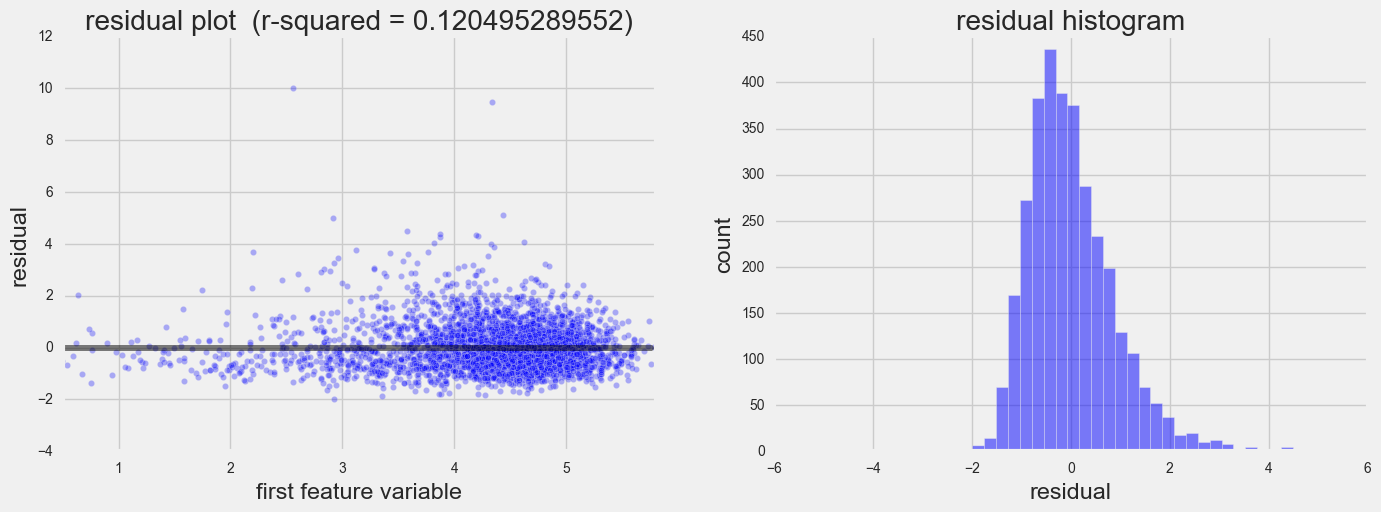

In [83]:
y_pred = fit.predict(X_test)
score = metrics.r2_score(y_test, y_pred)
S1 = score

res = fit.predict(X)-y
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(X.iloc[:,1], res,alpha = .3)
plt.plot(X_test.iloc[:,1],X_test.iloc[:,1]*0,alpha = .5,c='k')
plt.xlabel('first feature variable')
plt.ylabel('residual')
plt.xlim([0.5,5.8])
plt.title('residual plot ' + ' (r-squared = ' + str(score) +')');

plt.subplot(1,2,2)
plt.hist(res,bins = 50,alpha = .5,color='b')
plt.xlabel('residual')
plt.ylabel('count')
plt.xlim([-6,6])
plt.title('residual histogram');

# Facebook-only Model (grouped)

In [75]:
y = df1.iloc[:,0]
X = df1.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

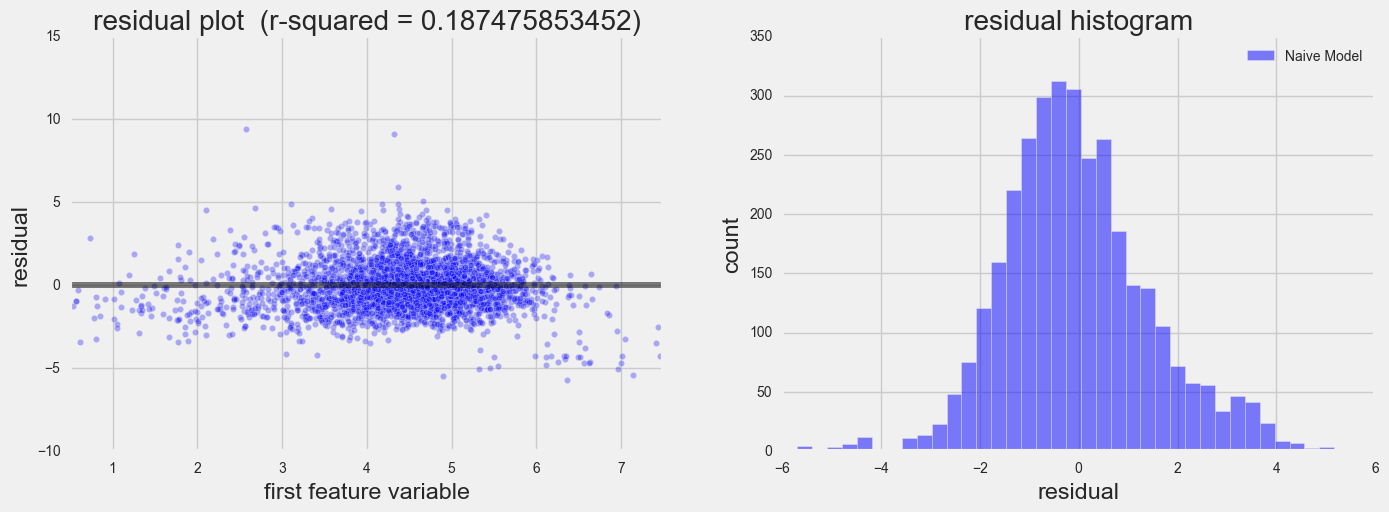

In [76]:
model = RidgeCV(alphas=(10,25,50,75,100), fit_intercept = True, cv = 10)
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
score = metrics.r2_score(y_test, y_pred)

res2 = fit.predict(X)-y
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(X.iloc[:,1], res2,alpha = .3, c='b')
plt.plot(X_test.iloc[:,1],X_test.iloc[:,1]*0,c='k',alpha = .5)
plt.xlabel('first feature variable')
plt.ylabel('residual')
plt.xlim([0.5,7.5])
plt.title('residual plot ' + ' (r-squared = ' + str(score) +')');

plt.subplot(1,2,2)
plt.hist(res2,bins = 50,alpha = .5,color='b')
plt.xlabel('residual')
plt.ylabel('count')
plt.xlim([-6,6])
plt.title('residual histogram');
plt.legend(['Naive Model','Group-Standardized Model']);


In [32]:
X1 = X_test.iloc[:,1]
R1 = y_pred-y_test

# Facebook+Awards Model

In [84]:
y = df2.iloc[:,0]
X = df2.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

 ## 1. Linear Regression (with ridge regularization)

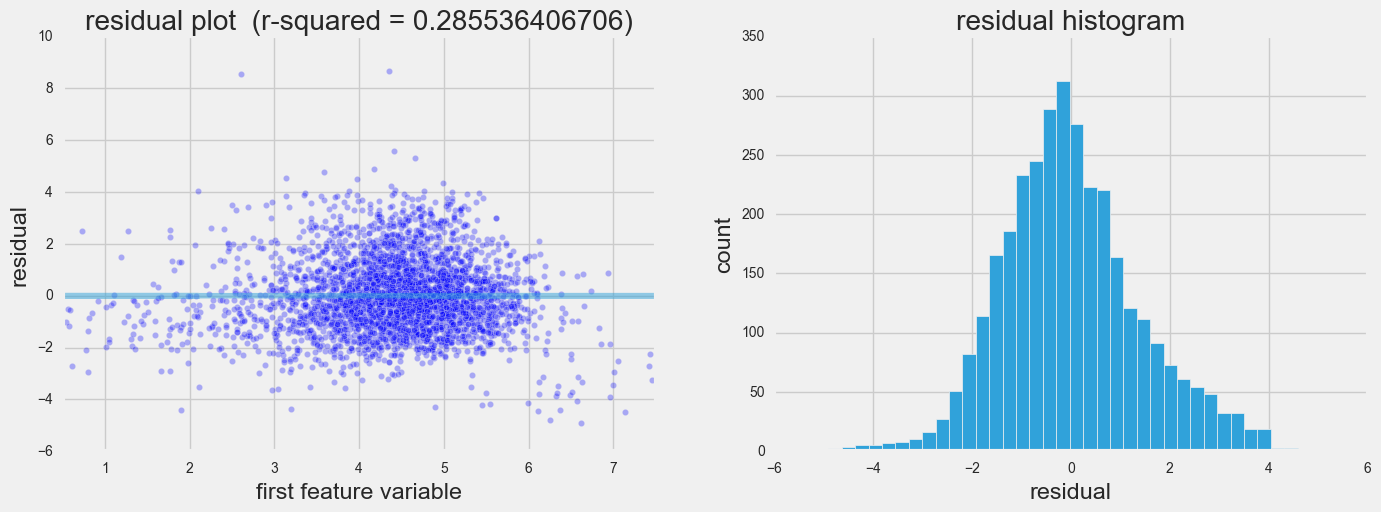

In [90]:
model = RidgeCV(alphas=(10,25,50,75,100), fit_intercept = True, cv = 10)
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
score = metrics.r2_score(y_test, y_pred)

res = fit.predict(X)-y
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(X.iloc[:,1], res,alpha = .3)
plt.plot(X.iloc[:,1],X.iloc[:,1]*0,alpha = .5)
plt.xlabel('first feature variable')
plt.ylabel('residual')
plt.xlim([0.5,7.5])
plt.title('residual plot ' + ' (r-squared = ' + str(score) +')');

plt.subplot(1,2,2)
plt.hist(res,bins = 50)
plt.xlabel('residual')
plt.ylabel('count')
plt.xlim([-6,6])
plt.title('residual histogram');


In [91]:
X2 = X_test.iloc[:,1]
R2 = y_pred-y_test

## 2. Random Forest Regression

In [99]:
model = RandomForestRegressor(n_estimators = 250, max_features = 7,
                                min_samples_leaf = 4, n_jobs=4)
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
score = metrics.r2_score(y_test, y_pred)
X1 = X_test.iloc[:,1]
R1 = y_pred-y_test
S1 = score
print(score)
res1 = fit.predict(X)-y

0.330057724286


In [100]:
model = GradientBoostingRegressor(n_estimators = 250, learning_rate=0.25)
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
score = metrics.r2_score(y_test, y_pred)
X2 = X_test.iloc[:,1]
R2 = y_pred-y_test
S2 = score
print(score)
res2 = fit.predict(X)-y

0.393310526413


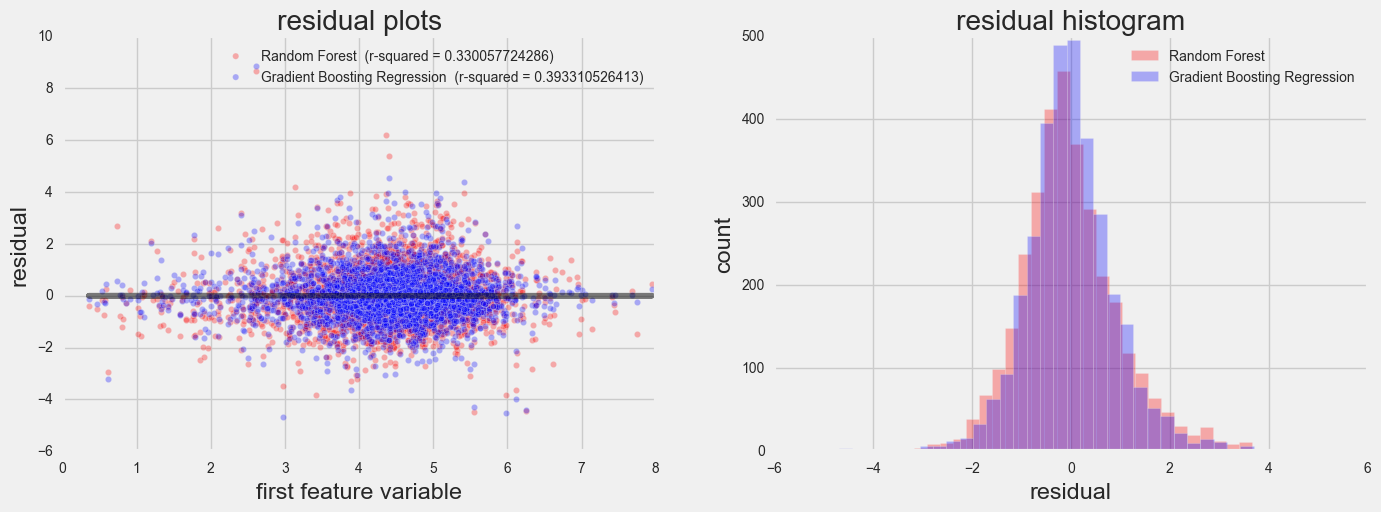

In [108]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(X.iloc[:,1], res1, c='r', alpha = .3)
plt.scatter(X.iloc[:,1], res2, c='b', alpha = .3)
plt.xlabel('first feature variable')
plt.ylabel('residual')
plt.title('residual plots');
plt.xlim([0,8])
plt.legend(['Random Forest ' + ' (r-squared = ' + str(S1) +')'
            ,'Gradient Boosting Regression ' + ' (r-squared = ' + str(S2) +')']);
plt.plot(X.iloc[:,1],X.iloc[:,1]*0,alpha = .5,c='k')

plt.subplot(1,2,2)
plt.hist(res1,bins = 50, color='r', alpha = 0.3)
plt.hist(res2,bins = 50, color='b', alpha = 0.3)
plt.xlabel('residual')
plt.ylabel('count')
plt.xlim([-6,6])
plt.title('residual histogram');
plt.legend(['Random Forest','Gradient Boosting Regression']);

## Comparison between Facebook-only model and Facebook+awards model

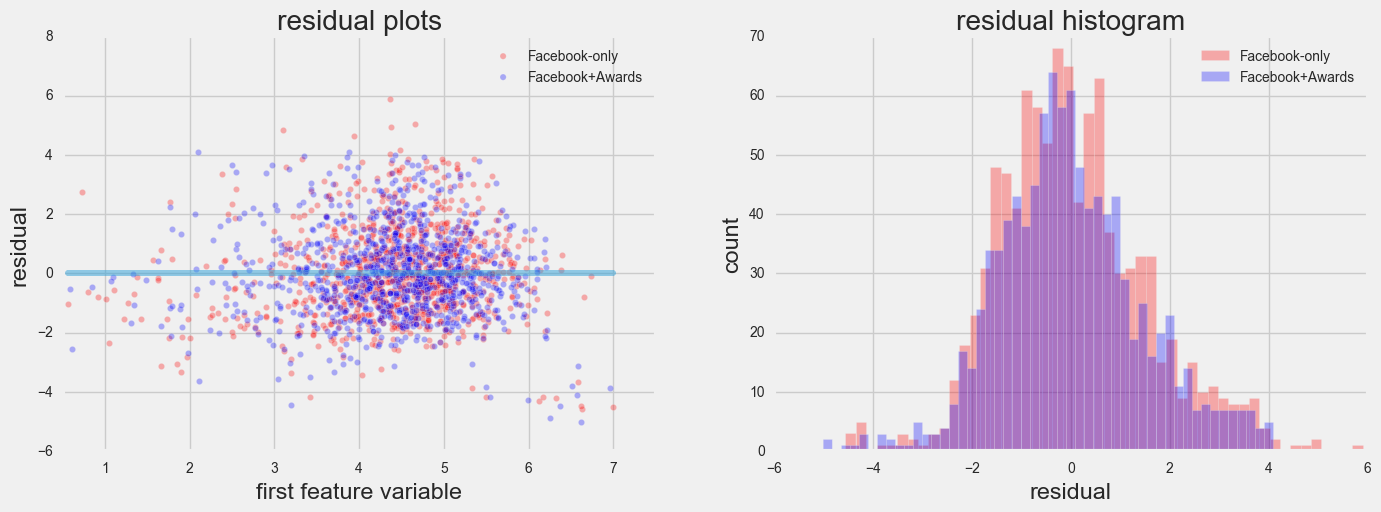

In [40]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(X1, R1, c='r', alpha = .3)
plt.scatter(X2, R2, c='b', alpha = .3)
plt.xlabel('first feature variable')
plt.ylabel('residual')
plt.xlim([0.5,7.5])
plt.title('residual plots');
plt.legend(['Facebook-only','Facebook+Awards'])
plt.plot(X1,X1*0,alpha = .5)

plt.subplot(1,2,2)
plt.hist(R1,bins = 50, color='r', alpha = 0.3)
plt.hist(R2,bins = 50, color='b', alpha = 0.3)
plt.xlabel('residual')
plt.ylabel('count')
plt.xlim([-6,6])
plt.title('residual histogram');
plt.legend(['Facebook-only','Facebook+Awards']);